<a href="https://colab.research.google.com/github/husthorng/Backpropagation_NN/blob/main/backpropagation_4x1y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error:0.4477946282344683
Error:0.26353446368276207
Error:0.13645034441600207
Error:0.08073083522990321
Error:0.05973535732121917
Error:0.04878205649526744
Error:0.04195246647618082
Error:0.03722708563460629
Error:0.03372972224421334
Error:0.031016778375762645
Error:0.028838406389514428
Error:0.027042481358664373
Error:0.025530709099570524
Error:0.024236535519370724
Error:0.023113161778002822
Error:0.022126638790964433
Error:0.021251687050692098
Error:0.020469059686453878
Error:0.019763819843622164
Error:0.019124181051320195
output after Training:
[[0.97149626]
 [0.00864924]
 [0.98718984]
 [0.03088548]
 [0.02187616]
 [0.99033116]
 [0.98256959]]


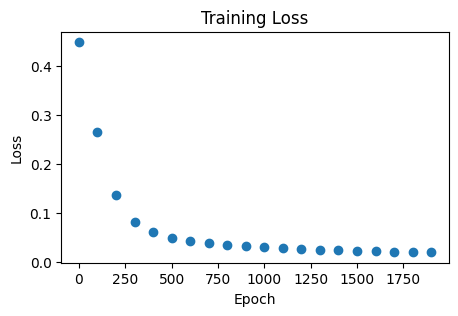

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))



numTag=1   #   輸出的數目
nnode=4
epochs, epstep=2000,100

losses = []
R_losses=[]



url = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/exdata4X1y.csv"
records = pd.read_csv(url,encoding='utf-8',header=None)
Xi=records.iloc[0:records.shape[0],0:records.shape[1]-numTag].values
y=records.iloc[:,list(records.shape[1]-np.arange(numTag,0,-1))].values

X=np.insert(Xi,Xi[0].size,1,axis=1)
np.random.seed(1)
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((X[0].size,nnode)) - 1
syn1 = 2*np.random.random((nnode+1,numTag)) - 1

for j in range(epochs):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l1=np.insert(l1,l1[0].size,1,axis=1)
    l2 = sigmoid(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% epstep) == 0:
      losses.append(np.mean(np.abs(l2_error)))
      R_losses.append(j)
      print("Error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*sigmoid(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)[:,:-1]

#print output
print("output after Training:")
print(l2)

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(R_losses, losses)
#plt.scatter(R_losses, losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

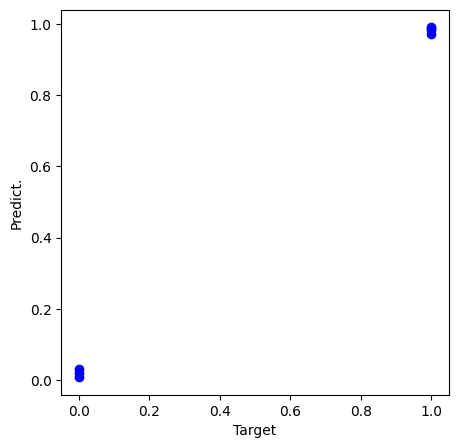

In [ ]:
urltest = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X2y1.csv"
records = pd.read_csv(url,encoding='utf-8',header=None)
Xi=records.iloc[0:records.shape[0],0:records.shape[1]-numTag].values
y=records.iloc[:,list(records.shape[1]-np.arange(numTag,0,-1))].values
X=np.insert(Xi,Xi[0].size,1,axis=1)
l0 = X
l1 = sigmoid(np.dot(l0,syn0))
l1=np.insert(l1,l1[0].size,1,axis=1)
l2 = sigmoid(np.dot(l1,syn1))
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.scatter(y[:,0], l2[:,0],color = "blue")
plt.title('')
plt.xlabel('Target')
plt.ylabel('Predict.')
plt.show()

In [ ]:
syn1

array([[  3.19787556],
       [ 12.23544219],
       [-12.64151003],
       [ -3.8237726 ],
       [ -2.61913888]])